In [19]:
import os
import re
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

from matplotlib.backends.backend_pdf import PdfPages

In [20]:
sns.color_palette('deep')
sns.set_style('white')

LINEWIDTH = 1.5

workdir = os.getcwd()
path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
f = os.path.join(path, "training_results.pdf")

pp = PdfPages(f)

In [21]:
# code for contents of plot

# filename = "training_results_com_2tran_LNAV_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv"


def read_train_file(filename, limit=5500):
    workdir = os.getcwd()
    # path = os.path.relpath('..\\..\\..\\results\\training_results\\complete_experiment_first', workdir)
    path = os.path.relpath('..\\..\\..\\results\\training_results', workdir)

    file = os.path.join(path, filename)

    data = []

    count = 0

    with open(file) as f:
        csvreader = csv.reader(f)
        keys = next(csvreader)

        result = dict.fromkeys(keys)

        first = True

        for row in csvreader:
            if first:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key] = [int(item)]
                    else:
                        try:
                            result[key] = [float(item)]
                        except ValueError:
                            result[key] = [item]
                first = False
            else:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key].append(int(item))
                    else:
                        try:
                            result[key].append(float(item))
                        except ValueError:
                            result[key].append(item)

            count += 1

            if count > limit:
                break

    return result

## Loss

In [22]:
def loss_train(filename, result):  #, loss_indices_dict, loss_data_dict):
    loss_indices_dict = {}
    loss_data_dict = {}

    for f in list(result.keys()):
        loss_indices_dict[f] = [i for i, j in enumerate(result[f]['loss']) if j != ""]
        loss_data_dict[f] = [result[f]['loss'][x] for x in loss_indices_dict[f]]

    loss_indices = list(loss_indices_dict.values())
    loss_data = list(loss_data_dict.values())

    fig, axs = plt.subplots(3, 3, figsize=(10,6), sharey=True, sharex=True)
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(x=loss_indices[0][20:], y=loss_data[0][20:], linewidth=LINEWIDTH, ax=axs[0, 0])
    running_avg = uniform_filter1d(loss_data[0][20:], 20)
    sns.lineplot(x=loss_indices[0][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[0, 0])
    axs[0, 0].set_title(list(result.keys())[0])
    sns.lineplot(x=loss_indices[1][20:], y=loss_data[1][20:], linewidth=LINEWIDTH, ax=axs[0, 1])
    running_avg = uniform_filter1d(loss_data[1][20:], 20)
    sns.lineplot(x=loss_indices[1][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[0, 1])
    axs[0, 1].set_title(list(result.keys())[1])
    sns.lineplot(x=loss_indices[2][20:], y=loss_data[2][20:], linewidth=LINEWIDTH, ax=axs[0, 2])
    running_avg = uniform_filter1d(loss_data[2][20:], 20)
    sns.lineplot(x=loss_indices[2][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[0, 2])
    axs[0, 2].set_title(list(result.keys())[2])
    sns.lineplot(x=loss_indices[3][20:], y=loss_data[3][20:], linewidth=LINEWIDTH, ax=axs[1, 0])
    running_avg = uniform_filter1d(loss_data[3][20:], 20)
    sns.lineplot(x=loss_indices[3][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[1, 0])
    axs[1, 0].set_title(list(result.keys())[3])
    sns.lineplot(x=loss_indices[4][20:], y=loss_data[4][20:], linewidth=LINEWIDTH, ax=axs[1, 1])
    running_avg = uniform_filter1d(loss_data[4][20:], 20)
    sns.lineplot(x=loss_indices[4][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[1, 1])
    axs[1, 1].set_title(list(result.keys())[4])
    sns.lineplot(x=loss_indices[5][20:], y=loss_data[5][20:], linewidth=LINEWIDTH, ax=axs[1, 2])
    running_avg = uniform_filter1d(loss_data[5][20:], 20)
    sns.lineplot(x=loss_indices[5][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[1, 2])
    axs[1, 2].set_title(list(result.keys())[5])
    sns.lineplot(x=loss_indices[6][20:], y=loss_data[6][20:], linewidth=LINEWIDTH, ax=axs[2, 0])
    running_avg = uniform_filter1d(loss_data[6][20:], 20)
    sns.lineplot(x=loss_indices[6][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[2, 0])
    axs[2, 0].set_title(list(result.keys())[6])
    sns.lineplot(x=loss_indices[7][20:], y=loss_data[7][20:], linewidth=LINEWIDTH, ax=axs[2, 1])
    running_avg = uniform_filter1d(loss_data[7][20:], 20)
    sns.lineplot(x=loss_indices[7][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[2, 1])
    axs[2, 1].set_title(list(result.keys())[7])
    sns.lineplot(x=loss_indices[8][20:], y=loss_data[8][20:], linewidth=LINEWIDTH, ax=axs[2, 2])
    running_avg = uniform_filter1d(loss_data[8][20:], 20)
    sns.lineplot(x=loss_indices[8][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[2, 2])
    axs[2, 2].set_title(list(result.keys())[8])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Loss')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
    f = os.path.join(path, filename)
    # plt.savefig(f + ".pdf", bbox_inches="tight")
    pp.savefig(bbox_inches="tight")
    # plt.show()

## Reward

In [23]:
def reward_train(filename, result_dict):
    result = list(result_dict.values())

    fig, axs = plt.subplots(3, 3, figsize=(10,6), sharey=True, sharex=True)
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(data=result[0]['average reward'], linewidth=LINEWIDTH, ax=axs[0, 0])
    running_avg = uniform_filter1d(result[0]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 0])
    axs[0, 0].set_title(list(result_dict.keys())[0])
    sns.lineplot(data=result[1]['average reward'], linewidth=LINEWIDTH, ax=axs[0, 1])
    running_avg = uniform_filter1d(result[1]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 1])
    axs[0, 1].set_title(list(result_dict.keys())[1])
    sns.lineplot(data=result[2]['average reward'], linewidth=LINEWIDTH, ax=axs[0, 2])
    running_avg = uniform_filter1d(result[2]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 2])
    axs[0, 2].set_title(list(result_dict.keys())[2])
    sns.lineplot(data=result[3]['average reward'], linewidth=LINEWIDTH, ax=axs[1, 0])
    running_avg = uniform_filter1d(result[3]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 0])
    axs[1, 0].set_title(list(result_dict.keys())[3])
    sns.lineplot(data=result[4]['average reward'], linewidth=LINEWIDTH, ax=axs[1, 1])
    running_avg = uniform_filter1d(result[4]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 1])
    axs[1, 1].set_title(list(result_dict.keys())[4])
    sns.lineplot(data=result[5]['average reward'], linewidth=LINEWIDTH, ax=axs[1, 2])
    running_avg = uniform_filter1d(result[5]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 2])
    axs[1, 2].set_title(list(result_dict.keys())[5])
    sns.lineplot(data=result[6]['average reward'], linewidth=LINEWIDTH, ax=axs[2, 0])
    running_avg = uniform_filter1d(result[6]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[2, 0])
    axs[2, 0].set_title(list(result_dict.keys())[6])
    sns.lineplot(data=result[7]['average reward'], linewidth=LINEWIDTH, ax=axs[2, 1])
    running_avg = uniform_filter1d(result[7]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[2, 1])
    axs[2, 1].set_title(list(result_dict.keys())[7])
    sns.lineplot(data=result[8]['average reward'], linewidth=LINEWIDTH, ax=axs[2, 2])
    running_avg = uniform_filter1d(result[8]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[2, 2])
    axs[2, 2].set_title(list(result_dict.keys())[8])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Reward')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
    f = os.path.join(path, filename)
    # plt.savefig(f + ".pdf", bbox_inches="tight")
    pp.savefig(bbox_inches="tight")
    # plt.show()

## Action Distribution

In [24]:
def action_train(filename, result):
    actions_dict = {}
    for f in list(result.keys()):
        actions_dict[f] = {'LEFT': result[f]['action LEFT'], 'RIGHT': result[f]['action RIGHT'], 'LNAV': result[f]['action LNAV']}

    actions = list(actions_dict.values())

    fig, axs = plt.subplots(3, 3, figsize=(10,6), sharey=True, sharex=True)
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(data=actions[0], linewidth=LINEWIDTH, ax=axs[0, 0])
    axs[0, 0].set_title(list(result.keys())[0])
    sns.lineplot(data=actions[1], linewidth=LINEWIDTH, ax=axs[0, 1])
    axs[0, 1].set_title(list(result.keys())[1])
    sns.lineplot(data=actions[2], linewidth=LINEWIDTH, ax=axs[0, 2])
    axs[0, 2].set_title(list(result.keys())[2])
    sns.lineplot(data=actions[3], linewidth=LINEWIDTH, ax=axs[1, 0])
    axs[1, 0].set_title(list(result.keys())[3])
    sns.lineplot(data=actions[4], linewidth=LINEWIDTH, ax=axs[1, 1])
    axs[1, 1].set_title(list(result.keys())[4])
    sns.lineplot(data=actions[5], linewidth=LINEWIDTH, ax=axs[1, 2])
    axs[1, 2].set_title(list(result.keys())[5])
    sns.lineplot(data=actions[6], linewidth=LINEWIDTH, ax=axs[2, 0])
    axs[2, 0].set_title(list(result.keys())[6])
    sns.lineplot(data=actions[7], linewidth=LINEWIDTH, ax=axs[2, 1])
    axs[2, 1].set_title(list(result.keys())[7])
    sns.lineplot(data=actions[8], linewidth=LINEWIDTH, ax=axs[2, 2])
    axs[2, 2].set_title(list(result.keys())[8])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Count')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.02,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    [[c.get_legend().remove() for c in r] for r in axs]

    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
    f = os.path.join(path, filename)
    # plt.savefig(f + ".pdf", bbox_inches="tight")
    pp.savefig(bbox_inches="tight")
    # plt.show()

## Loss of Separation

In [25]:
def separation_train(filename, result):
    data_dict = {}

    for f in list(result.keys()):
        data_dict[f] = {"conflicts": result[f]['conflicts'], "LoS": result[f]['LoS']}

    data = list(data_dict.values())

    fig, axs = plt.subplots(3, 3, figsize=(10,6), sharey=True, sharex=True)
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(data=data[0], linewidth=LINEWIDTH, ax=axs[0, 0])
    running_avg = uniform_filter1d(data[0]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 0], color="darkgrey")
    axs[0, 0].set_title(list(result.keys())[0])
    sns.lineplot(data=data[1], linewidth=LINEWIDTH, ax=axs[0, 1])
    running_avg = uniform_filter1d(data[1]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 1], color="darkgrey")
    axs[0, 1].set_title(list(result.keys())[1])
    sns.lineplot(data=data[2], linewidth=LINEWIDTH, ax=axs[0, 2])
    running_avg = uniform_filter1d(data[2]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 2], color="darkgrey")
    axs[0, 2].set_title(list(result.keys())[2])
    sns.lineplot(data=data[3], linewidth=LINEWIDTH, ax=axs[1, 0])
    running_avg = uniform_filter1d(data[3]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 0], color="darkgrey")
    axs[1, 0].set_title(list(result.keys())[3])
    sns.lineplot(data=data[4], linewidth=LINEWIDTH, ax=axs[1, 1])
    running_avg = uniform_filter1d(data[4]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 1], color="darkgrey")
    axs[1, 1].set_title(list(result.keys())[4])
    sns.lineplot(data=data[5], linewidth=LINEWIDTH, ax=axs[1, 2])
    running_avg = uniform_filter1d(data[5]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 2], color="darkgrey")
    axs[1, 2].set_title(list(result.keys())[5])
    sns.lineplot(data=data[6], linewidth=LINEWIDTH, ax=axs[2, 0])
    running_avg = uniform_filter1d(data[6]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[2, 0], color="darkgrey")
    axs[2, 0].set_title(list(result.keys())[6])
    sns.lineplot(data=data[7], linewidth=LINEWIDTH, ax=axs[2, 1])
    running_avg = uniform_filter1d(data[7]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[2, 1], color="darkgrey")
    axs[2, 1].set_title(list(result.keys())[7])
    sns.lineplot(data=data[8], linewidth=LINEWIDTH, ax=axs[2, 2])
    running_avg = uniform_filter1d(data[8]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[2, 2], color="darkgrey")
    axs[2, 2].set_title(list(result.keys())[8])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Conflict/LoS')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(visible=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.02,0.5), loc='center right', bbox_transform=plt.gcf().transFigure)
    [[c.get_legend().remove() for c in r] for r in axs]
    # plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\pdfs\\', workdir)
    f = os.path.join(path, filename)
    # plt.savefig(f + ".pdf", bbox_inches="tight")
    pp.savefig(bbox_inches="tight")
    # plt.show()

C:\Users\jeroe\AppData\Local\Temp\ipykernel_21368\1826815608.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(3, 3, figsize=(10,6), sharey=True, sharex=True)


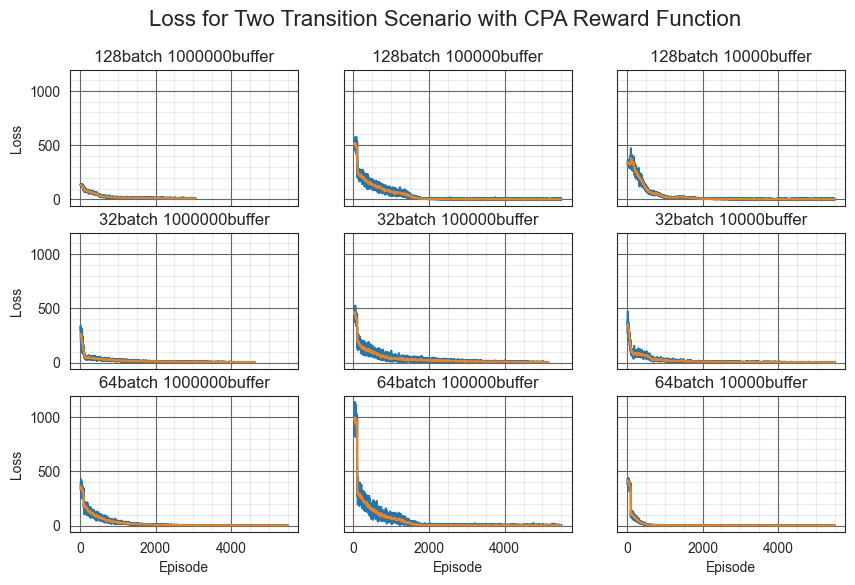

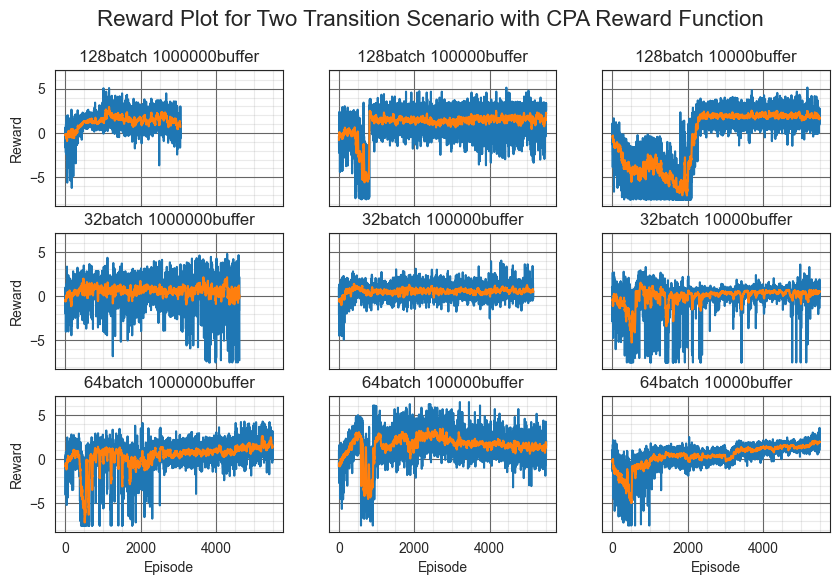

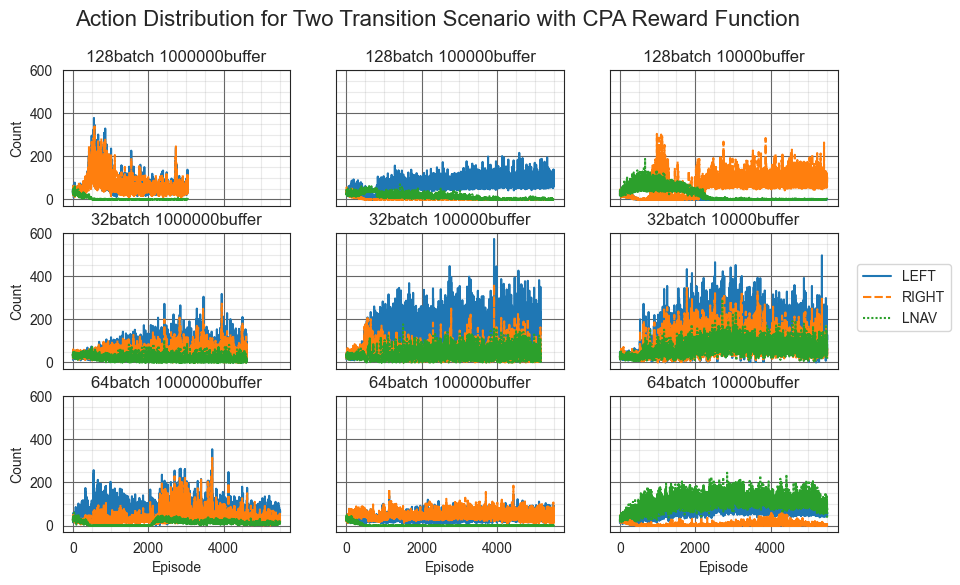

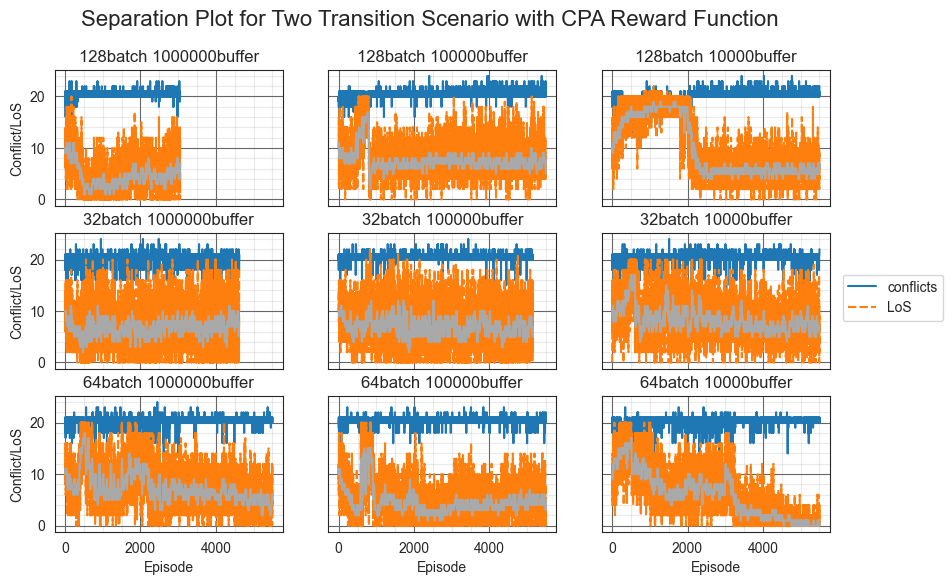

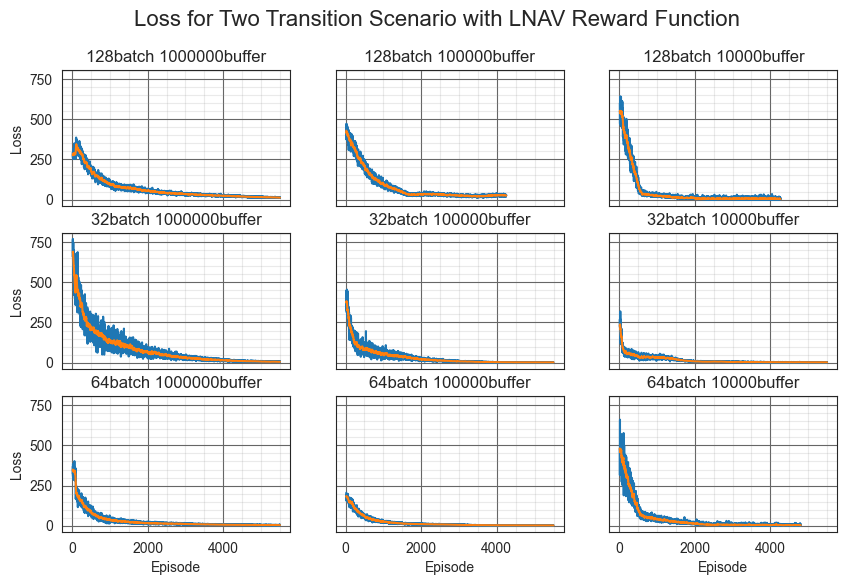

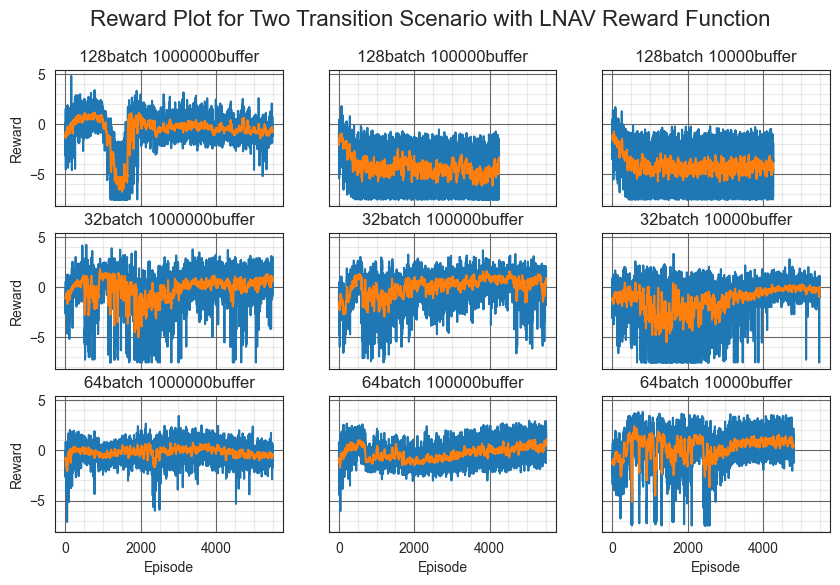

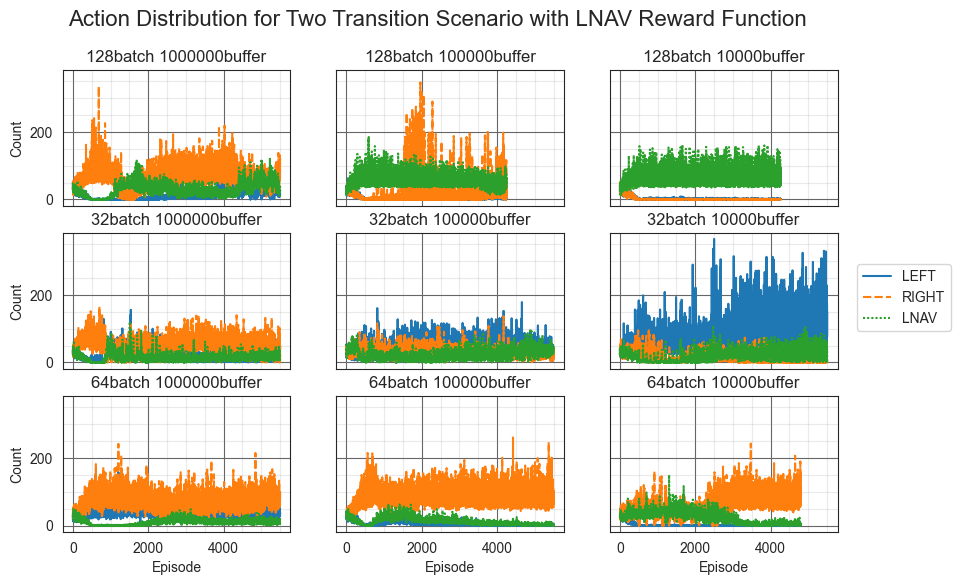

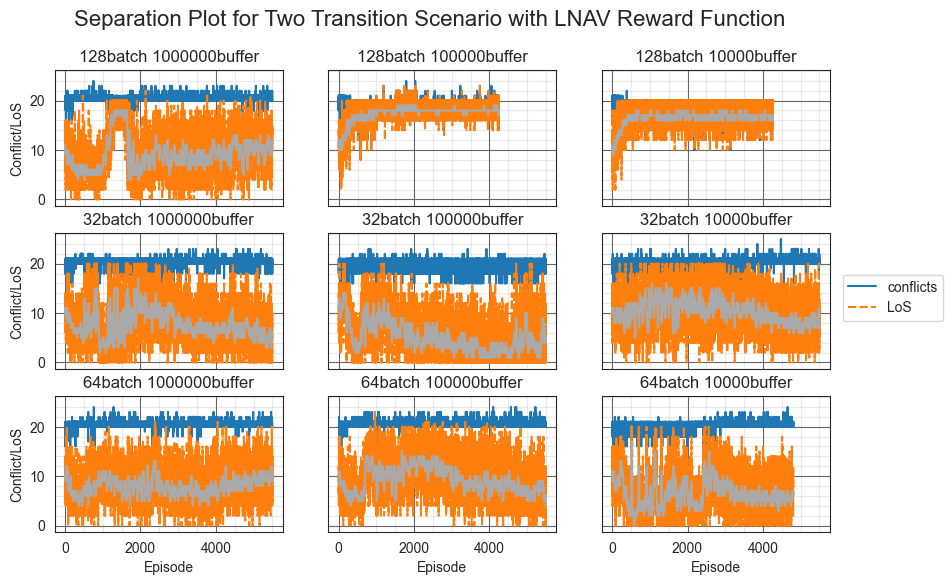

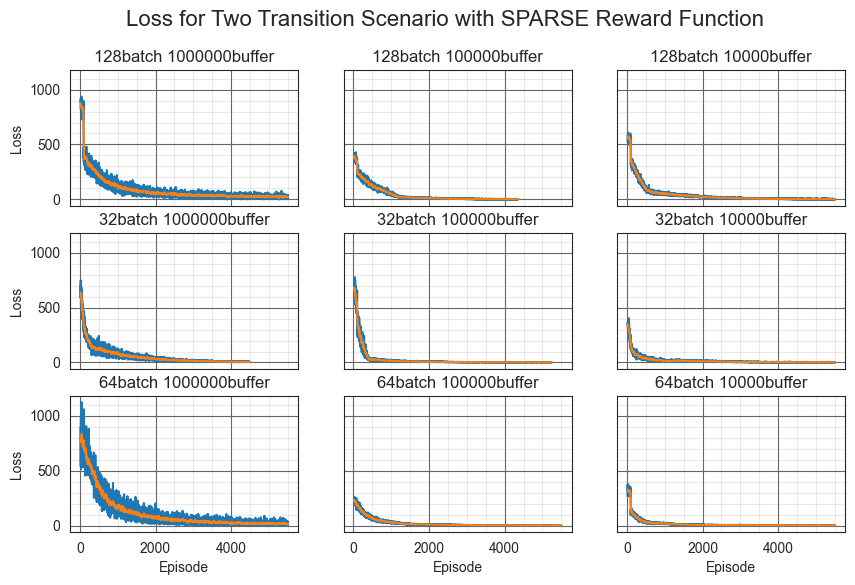

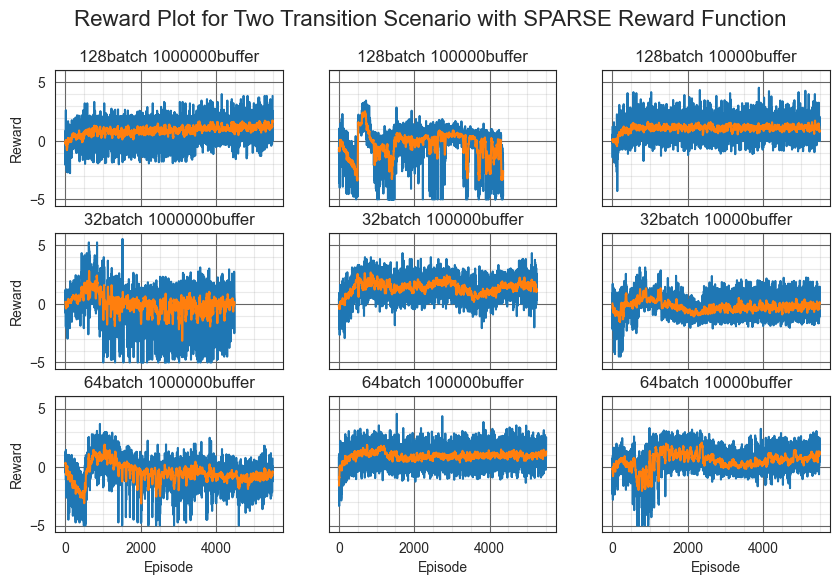

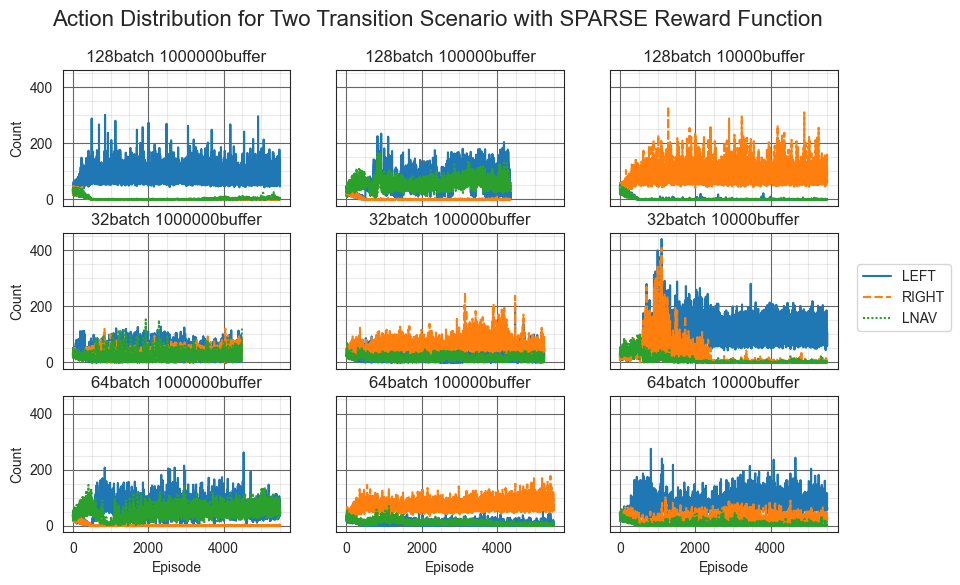

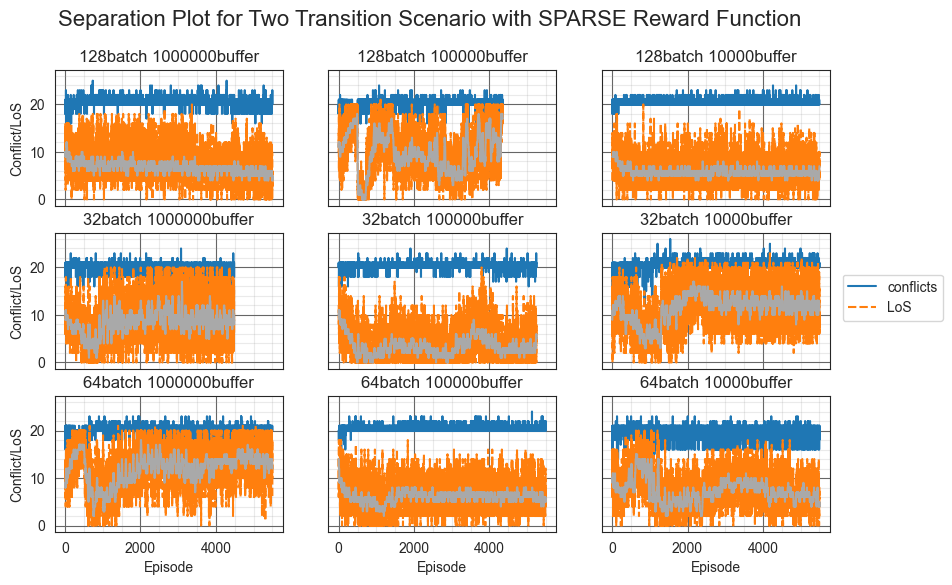

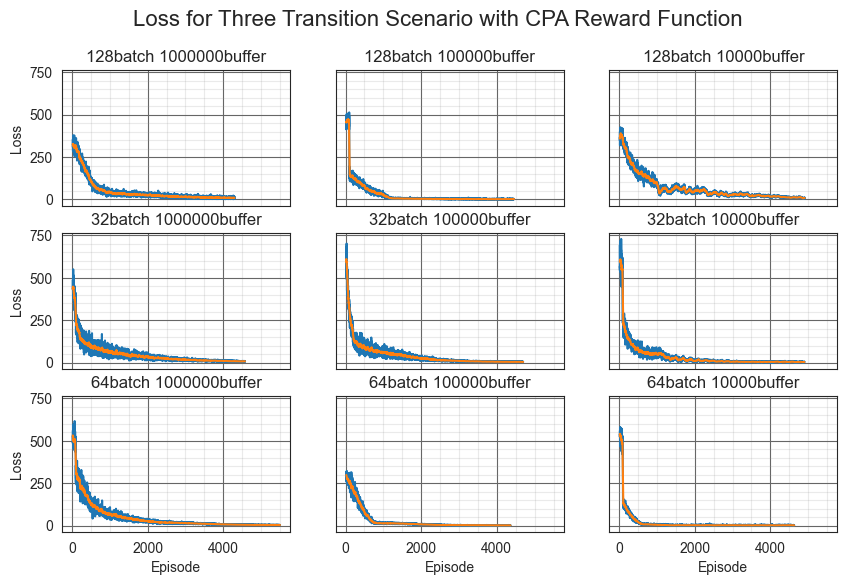

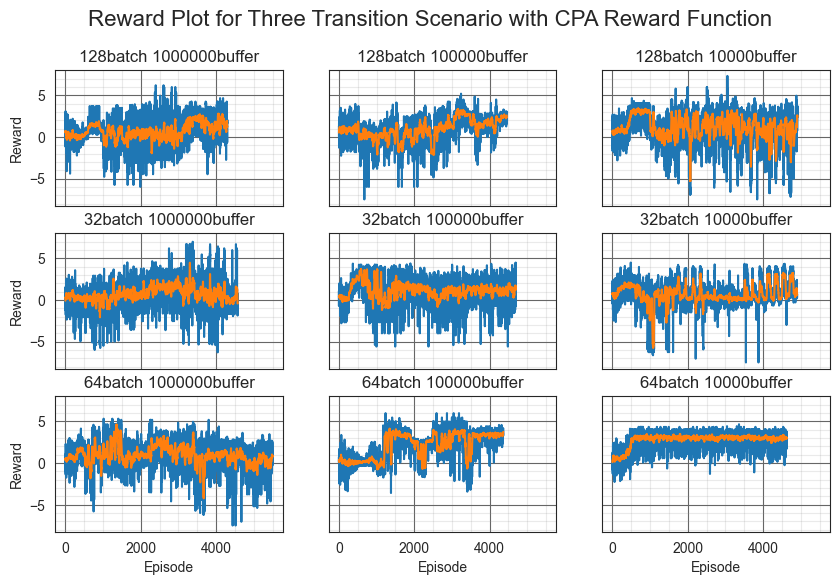

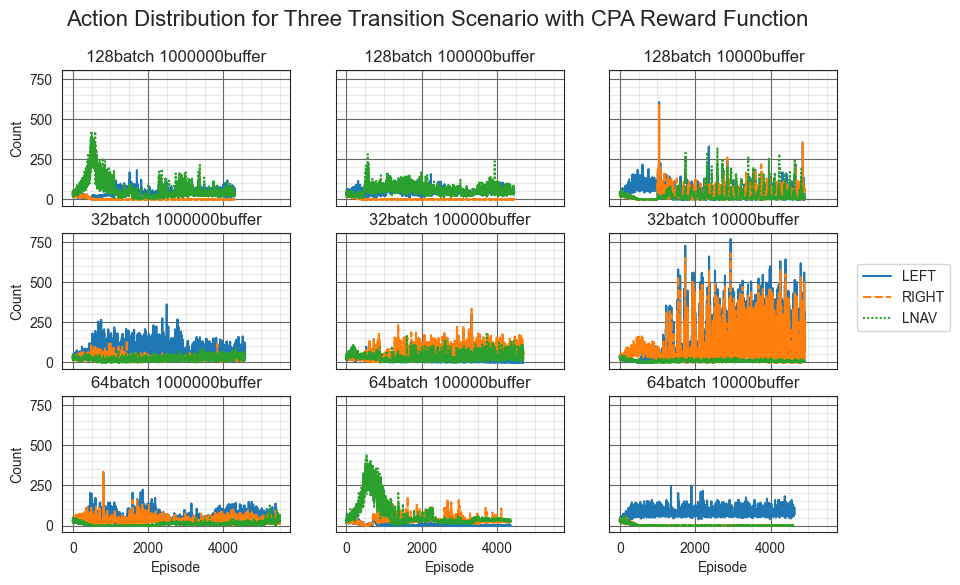

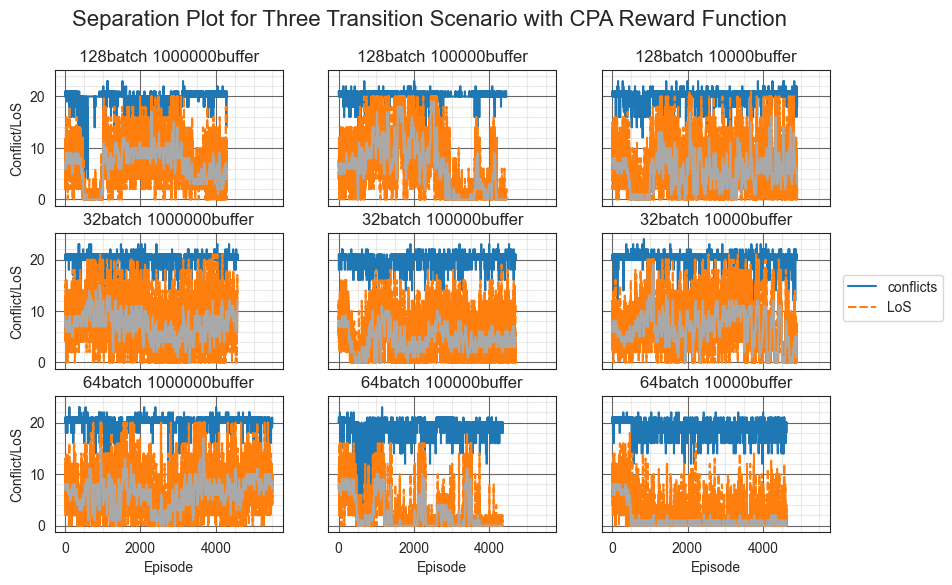

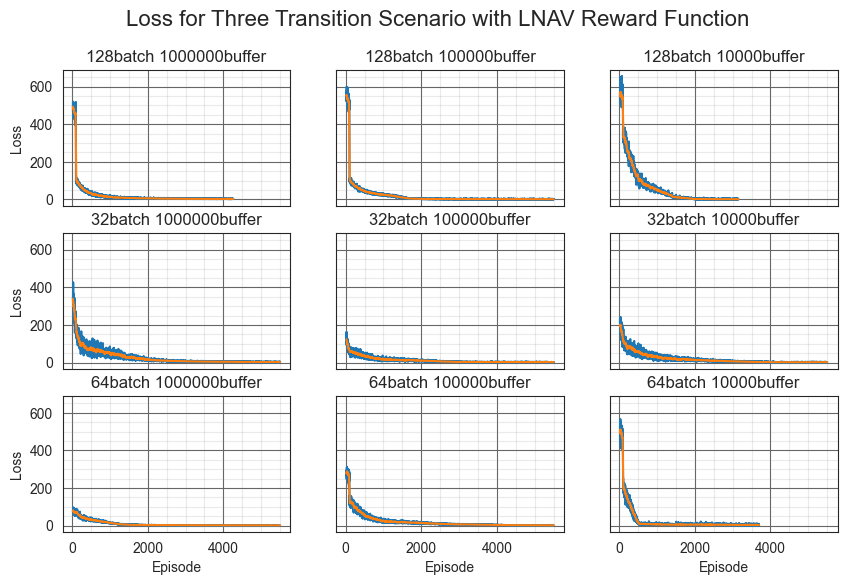

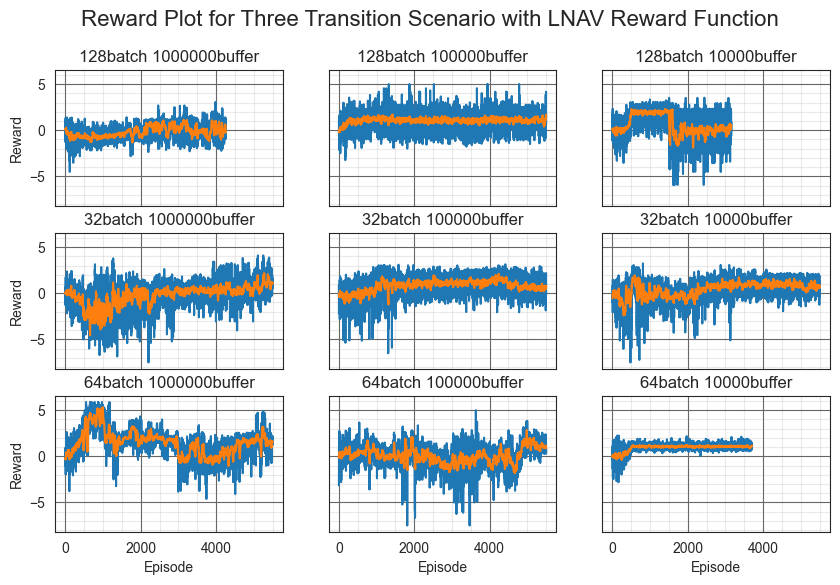

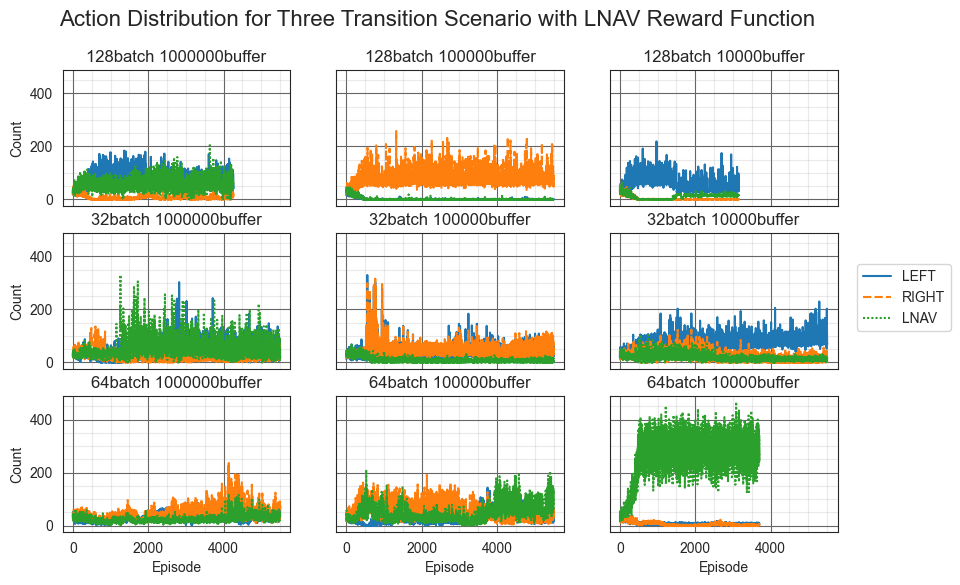

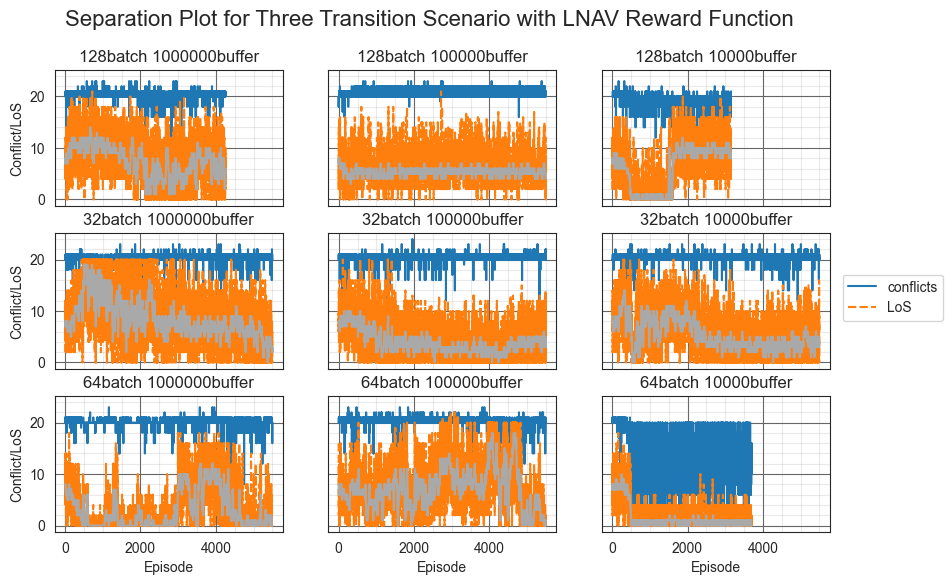

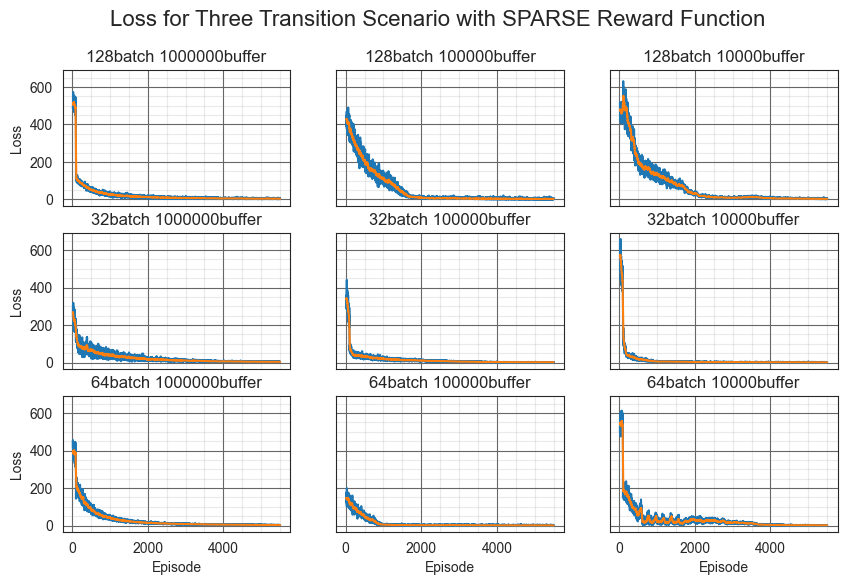

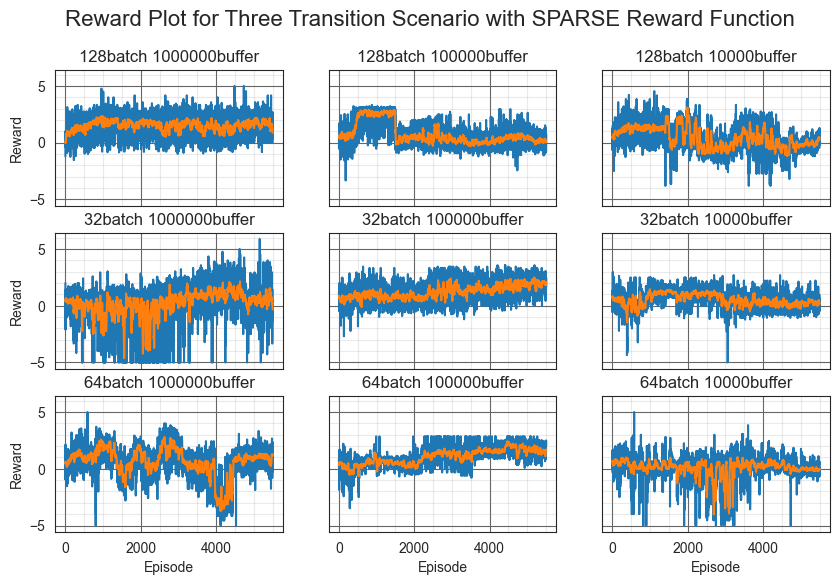

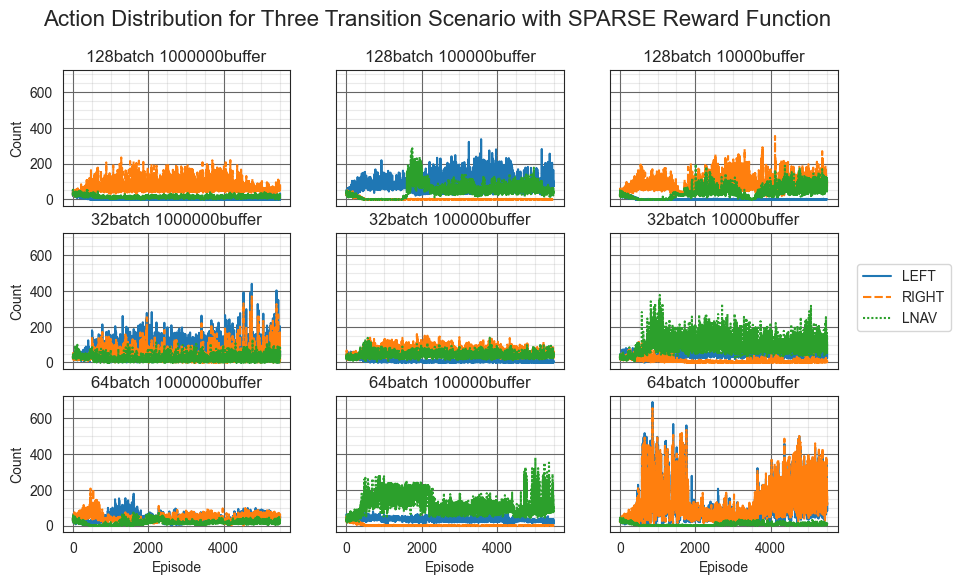

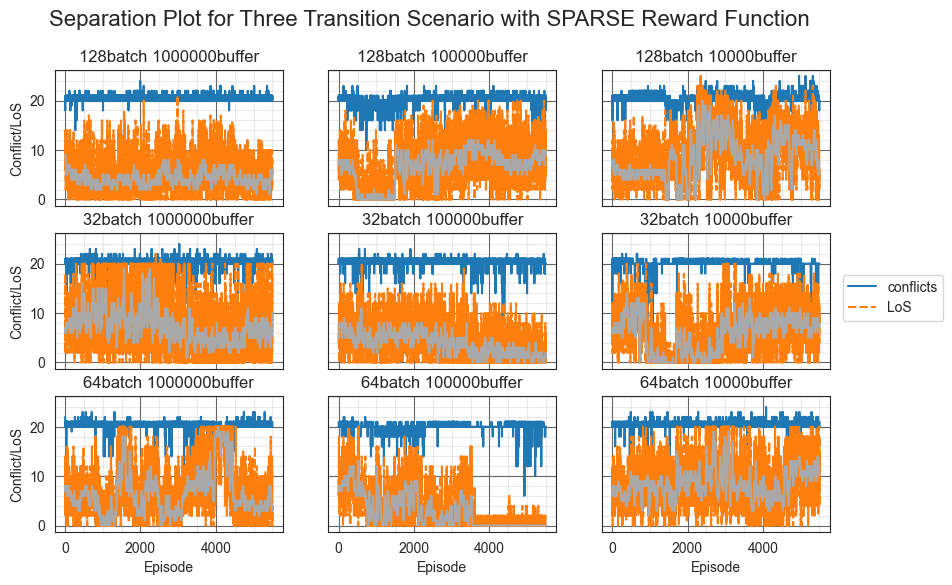

In [26]:
workdir = os.getcwd()
# path = os.path.relpath('..\\..\\..\\results\\training_results\\complete_experiment_first', workdir)
path = os.path.relpath('..\\..\\..\\results\\training_results', workdir)

two_cpa = {}
three_cpa = {}
two_lnav = {}
three_lnav = {}
two_sparse = {}
three_sparse = {}

for f in os.listdir(path):
    if os.path.isfile(os.path.join(path,f)):
        x = re.search("\d+batch", f).group()
        y = re.search("\d+buffer", f).group()
        name = x + " " + y
        if "2tran" in f:
            if "CPA" in f:
                two_cpa[name] = read_train_file(f)
            elif "LNAV" in f:
                two_lnav[name] = read_train_file(f)
            elif "SPARSE" in f:
                two_sparse[name] = read_train_file(f)
        elif "3tran" in f:
            if "CPA" in f:
                three_cpa[name] = read_train_file(f)
            elif "LNAV" in f:
                three_lnav[name] = read_train_file(f)
            elif "SPARSE" in f:
                three_sparse[name] = read_train_file(f)

loss_train("Loss for Two Transition Scenario with CPA Reward Function", two_cpa)
reward_train("Reward Plot for Two Transition Scenario with CPA Reward Function", two_cpa)
action_train("Action Distribution for Two Transition Scenario with CPA Reward Function", two_cpa)
separation_train("Separation Plot for Two Transition Scenario with CPA Reward Function", two_cpa)

loss_train("Loss for Two Transition Scenario with LNAV Reward Function", two_lnav)
reward_train("Reward Plot for Two Transition Scenario with LNAV Reward Function", two_lnav)
action_train("Action Distribution for Two Transition Scenario with LNAV Reward Function", two_lnav)
separation_train("Separation Plot for Two Transition Scenario with LNAV Reward Function", two_lnav)

loss_train("Loss for Two Transition Scenario with SPARSE Reward Function", two_sparse)
reward_train("Reward Plot for Two Transition Scenario with SPARSE Reward Function", two_sparse)
action_train("Action Distribution for Two Transition Scenario with SPARSE Reward Function", two_sparse)
separation_train("Separation Plot for Two Transition Scenario with SPARSE Reward Function", two_sparse)

loss_train("Loss for Three Transition Scenario with CPA Reward Function", three_cpa)
reward_train("Reward Plot for Three Transition Scenario with CPA Reward Function", three_cpa)
action_train("Action Distribution for Three Transition Scenario with CPA Reward Function", three_cpa)
separation_train("Separation Plot for Three Transition Scenario with CPA Reward Function", three_cpa)

loss_train("Loss for Three Transition Scenario with LNAV Reward Function", three_lnav)
reward_train("Reward Plot for Three Transition Scenario with LNAV Reward Function", three_lnav)
action_train("Action Distribution for Three Transition Scenario with LNAV Reward Function", three_lnav)
separation_train("Separation Plot for Three Transition Scenario with LNAV Reward Function", three_lnav)

loss_train("Loss for Three Transition Scenario with SPARSE Reward Function", three_sparse)
reward_train("Reward Plot for Three Transition Scenario with SPARSE Reward Function", three_sparse)
action_train("Action Distribution for Three Transition Scenario with SPARSE Reward Function", three_sparse)
separation_train("Separation Plot for Three Transition Scenario with SPARSE Reward Function", three_sparse)

pp.close()